In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant == 5].reset_index(drop=True)

data['feedback_type'] = 0 # complete feedback

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,5,1,1,55,51,4,3,1,1.114574,1,0
1,5,1,2,54,37,4,2,1,1.050116,1,0
2,5,1,3,54,50,4,2,2,0.812983,1,0
3,5,1,4,64,32,4,2,3,0.832987,1,0
4,5,1,5,42,34,3,1,1,1.233348,0,0


## Initialize the model

In [3]:
model = rlssm.RLLBAModel_2A(1,
                            separate_learning_rates=False,
                            nonlinear_mapping=True)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLLBA_2A', 'RLLBA_2A_nonlin', 1)

In [5]:
# sampling parameters
n_iter = 500
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)

In [6]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains,
                      include_last_values=False,
                      print_diagnostics=False)

INFO:cmdstanpy:CmdStan start processing


Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
k_priors {'mu': 1, 'sd': 1}
ndt_priors {'mu': 0, 'sd': 1}
sp_trial_var_priors {'mu': 0.3, 'sd': 1}
slop_priors {'mu': -1.5, 'sd': 1}
drift_asym_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 2, 'sd': 1}
drift_variability_priors {'mu': 1, 'sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [7]:
model_fit.rhat.describe()

,rhat
count,1944.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [8]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,1.0,lp__
alpha,1.0,alpha
ndt,1.0,ndt
k,1.0,k
sp_trial_var,1.0,sp_trial_var


In [9]:
model_fit.waic

{'lppd': -144.53795305763384,
 'p_waic': 7.150036728820955,
 'waic': 303.3759795729096,
 'waic_se': 30.06739038861803}

In [10]:
model_fit.samples

,transf_alpha,transf_ndt,transf_k,transf_sp_trial_var,transf_slop,transf_drift_asym,transf_drift_scaling,transf_drift_variability
0,0.188463,0.468252,0.935313,1.311660,0.206007,0.335671,2.45378,0.599041
1,0.192007,0.457089,0.973164,1.306230,0.205691,0.355597,2.54614,0.604441
2,0.311990,0.474627,0.749449,1.236890,0.131024,0.521062,1.97265,0.382329
3,0.193815,0.465391,1.047840,1.130270,0.184178,0.576296,2.31343,0.581922
4,0.151320,0.274047,1.966320,2.085450,0.108759,0.858586,3.87183,0.568003
...,...,...,...,...,...,...,...,...
995,0.238436,0.288955,1.733330,1.810410,0.126217,0.603792,3.65952,0.620011
996,0.253626,0.328917,1.488430,1.328290,0.109384,0.684645,2.74803,0.539528
997,0.259506,0.361755,1.530060,1.241180,0.115252,0.732201,3.15329,0.666468
998,0.256911,0.256351,1.380650,1.073400,0.137581,0.504817,2.34776,0.521639


In [11]:
model_fit.trial_samples

{'k_t': array([[0.935313, 0.935313, 0.935313, ..., 0.935313, 0.935313, 0.935313],
        [0.973164, 0.973164, 0.973164, ..., 0.973164, 0.973164, 0.973164],
        [0.749449, 0.749449, 0.749449, ..., 0.749449, 0.749449, 0.749449],
        ...,
        [1.53006 , 1.53006 , 1.53006 , ..., 1.53006 , 1.53006 , 1.53006 ],
        [1.38065 , 1.38065 , 1.38065 , ..., 1.38065 , 1.38065 , 1.38065 ],
        [1.30717 , 1.30717 , 1.30717 , ..., 1.30717 , 1.30717 , 1.30717 ]]),
 'sp_trial_var_t': array([[1.31166 , 1.31166 , 1.31166 , ..., 1.31166 , 1.31166 , 1.31166 ],
        [1.30623 , 1.30623 , 1.30623 , ..., 1.30623 , 1.30623 , 1.30623 ],
        [1.23689 , 1.23689 , 1.23689 , ..., 1.23689 , 1.23689 , 1.23689 ],
        ...,
        [1.24118 , 1.24118 , 1.24118 , ..., 1.24118 , 1.24118 , 1.24118 ],
        [1.0734  , 1.0734  , 1.0734  , ..., 1.0734  , 1.0734  , 1.0734  ],
        [0.948291, 0.948291, 0.948291, ..., 0.948291, 0.948291, 0.948291]]),
 'ndt_t': array([[0.468252, 0.468252, 0.46825

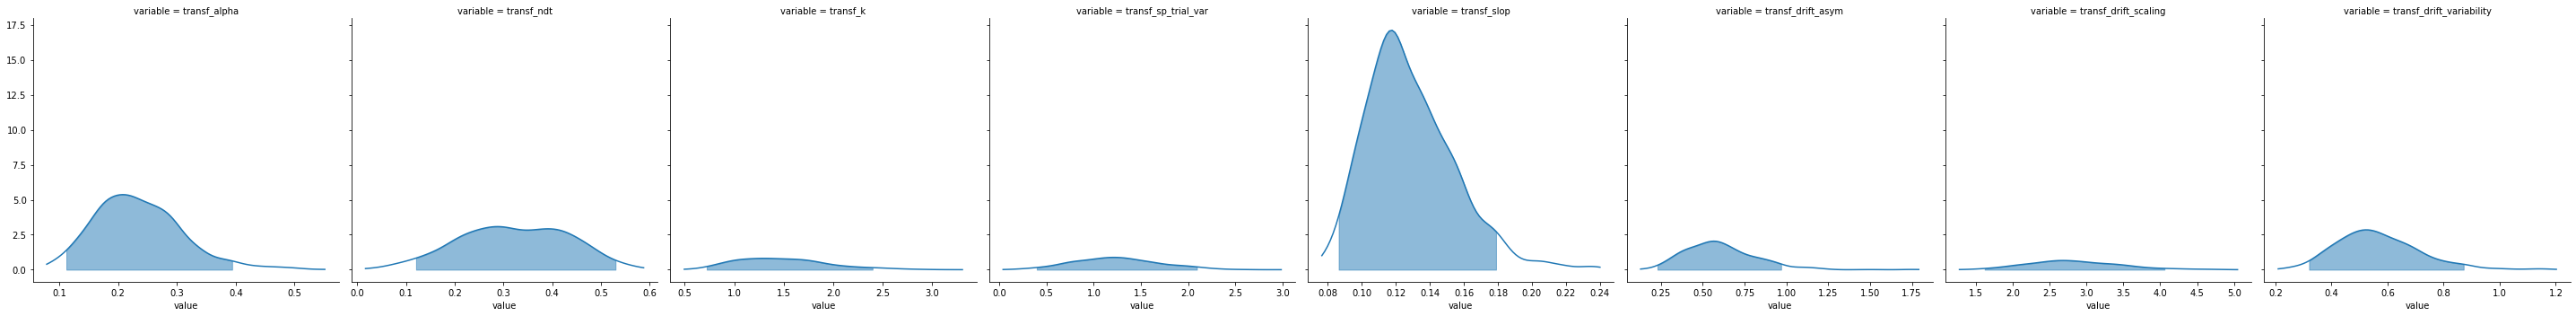

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [13]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.305958  1.695671  1.156230  1.200716  1.413202  1.160151   
2         1.380347  1.018965  0.952748  1.225186  1.500273  1.230210   
3         1.387684  1.245334  1.505809  1.344239  1.733299  1.077330   
4         2.072624  1.441541  1.182331  1.387833  1.452409  1.771258   
5         1.560474  1.559678  1.096464  1.334128  1.705841  1.718053   
...            ...       ...       ...       ...       ...       ...   
96        1.645723  1.336694  1.180350  1.051180  1.208377  1.352788   
97        1.723452  1.434993  0.896458  1.007226  1.234286  1.569477   
98        1.459335  1.271501  1.136981  1.128673  1.198390  1.164977   
99        1.442774  1.465253  1.558872  1.156458  1.694932  1.317254   
100       1.501376  1.049274  1.471197  1.030153  1.461912  1.739862   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.247372  1.420166  1.318293  1.684918  ...      1.0  1.0  0.0  1.0   
2         1.303513  1.068511  1.178026  1.515400  ...      1.0  1.0  1.0  1.0   
3         1.106790  1.293453  1.363565  0.982393  ...      1.0  1.0  1.0  1.0   
4         1.757045  1.204713  1.374089  1.551093  ...      1.0  1.0  1.0  1.0   
5         1.401270  1.607612  1.492896  1.281819  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.587746  1.370165  1.115117  1.366076  ...      1.0  1.0  1.0  1.0   
97        1.843552  1.518370  1.386280  1.465431  ...      1.0  1.0  0.0  1.0   
98        1.448412  1.471189  1.476060  1.120162  ...      1.0  1.0  1.0  1.0   
99        1.557829  1.646143  1.101352  1.356070  ...      1.0  1.0  1.0  1.0   
100       1.886891  1.692515  1.278236  1.288357  ...      1.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  0.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  0.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  0.0  
99        1.0  0.0  1.0  1.0  1.0  0.0  
100       1.0  1.0  0.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [14]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.895833,1.335216,0.580149,1.347632,1.397591,1.497865,1.639316,1.717266,1.033013,1.157830,1.275197,1.399449,1.697474
2,0.904167,1.289998,0.446052,1.191750,1.315820,1.421551,1.529929,1.674456,1.009163,1.118675,1.251521,1.387134,1.593400
3,0.825000,1.410023,0.545514,1.184582,1.342631,1.471317,1.663798,1.949834,1.018637,1.209409,1.372833,1.517839,1.719865
4,0.904167,1.369977,0.340163,1.413679,1.463272,1.597453,1.633772,1.805626,1.050512,1.226703,1.339043,1.442339,1.665712
5,0.833333,1.356454,0.328314,1.222390,1.373960,1.452331,1.570753,1.731997,0.989920,1.149608,1.315554,1.475045,1.681171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.925000,1.352087,0.286767,1.378516,1.402977,1.516615,1.640080,1.683321,1.108975,1.219007,1.324961,1.432534,1.626297
97,0.883333,1.334357,0.292170,1.246148,1.323337,1.432919,1.561161,1.727442,1.040140,1.180172,1.315723,1.421235,1.586813
98,0.858333,1.353775,0.504521,1.281401,1.411629,1.514663,1.591561,1.838377,1.069579,1.221257,1.296289,1.415778,1.596773


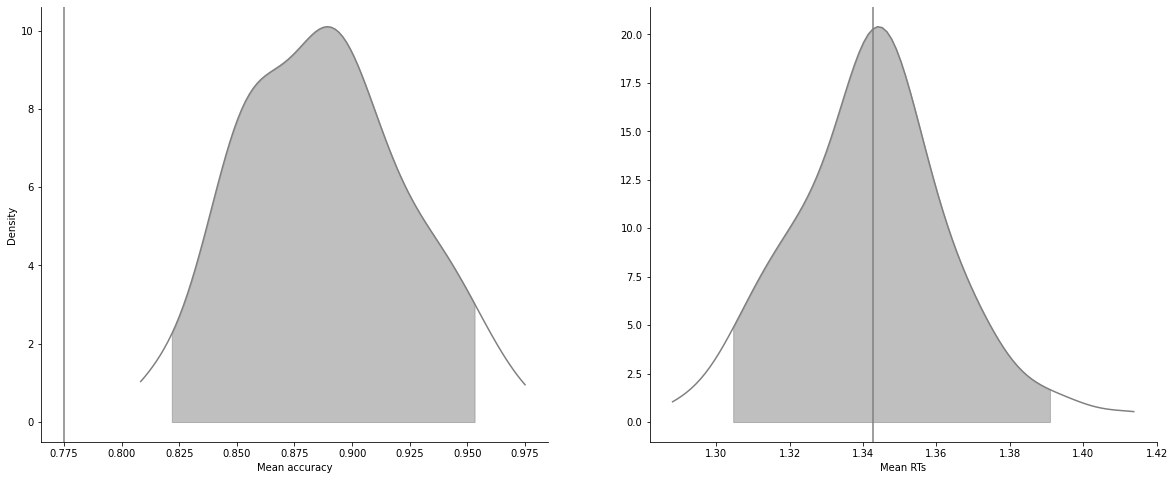

In [15]:
g = model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI')

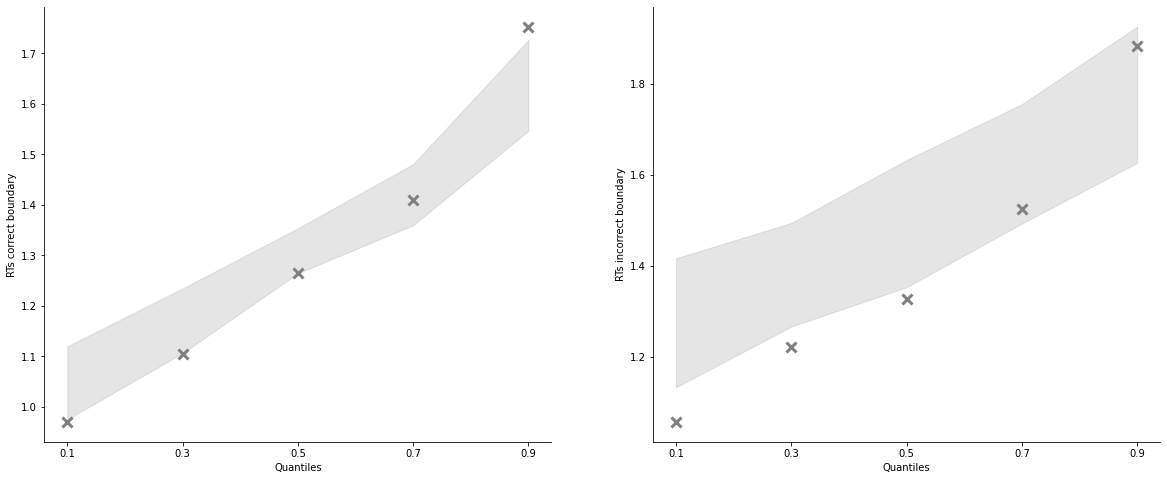

In [16]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [17]:
import numpy as np

In [18]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [19]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type,accuracy_rescale,choice_pair,block_bins
0,0,5,1,1,55,51,4,3,1,1.114574,1,0,1,CD,1
1,1,5,1,2,54,37,4,2,1,1.050116,1,0,1,BD,1
2,2,5,1,3,54,50,4,2,2,0.812983,1,0,1,BD,1
3,3,5,1,4,64,32,4,2,3,0.832987,1,0,1,BD,1
4,4,5,1,5,42,34,3,1,1,1.233348,0,0,2,AC,1


In [20]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.95  1.503355  0.189598   
                        2                0.95  1.469205  0.465468   
                        3                0.65  1.568038  0.020072   
                        4                0.90  1.658851 -0.347788   
                        5                0.85  1.461764  0.667914   
...                                       ...       ...       ...   
3           CD          96               1.00  1.350721 -0.032449   
                        97               0.90  1.335212  0.930919   
                        98               0.80  1.268561  0.414316   
                        99               0.75  1.298208 -0.055333   
                        100              0.90  1.282463  0.630137   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.532595             1.311188   
                        2                    1.479644             1.320044   
                        3                    1.481742             1.395940   
                        4                    1.609102             1.609214   
                        5                    1.402040             1.311406   
...                                               ...                  ...   
3           CD          96                        NaN             1.179117   
                        97                   1.258951             1.229186   
                        98                   1.276086             1.117527   
                        99                   1.364009             1.127907   
                        100                  1.297060             1.127323   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.532595             1.432095   
                        2                    1.479644             1.389617   
                        3                    1.518667             1.509083   
                        4                    1.664219             1.655682   
                        5                    1.408897             1.453120   
...                                               ...                  ...   
3           CD          96                        NaN             1.382014   
                        97                   1.259178             1.291313   
                        98                   1.333422             1.224882   
                        99                   1.431613             1.271543   
                        100                  1.334104             1.194851   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    1.532595             1.706205  
                        2                    1.479644             1.520376  
                        3                    1.777988             1.705472  
                        4                    1.719336             1.778609  
                        5                    1.465220             1.542910  
...                                               ...                  ...  
3           CD          96                        NaN             1.471230  
                        97                   1.259406             1.436699  
                        98                   1.392152             1.310100  
                        99                   1.478160             1.380768  
                        100                  1.371149             1.413692  

[1200 rows x 9 columns]

In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.866667  1.437614  0.052551               1.469426   
           2            0.833333  1.443665 -0.118137               1.636303   
           3            0.800000  1.445089  0.492201               1.299000   
           4            0.866667  1.460335  0.422053               1.465519   
           5            0.800000  1.462325  0.149597               1.396249   
...                          ...       ...       ...                    ...   
8          96           0.966667  1.360690  0.623933               1.311689   
           97           0.933333  1.361041  0.786904               1.377928   
           98           1.000000  1.352263  1.014188                    NaN   
           99           0.933333  1.305473  0.420718               1.386657   
           100          0.966667  1.398027  0.508283               1.438992   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.279359               1.538284   
           2                  1.138928               1.677339   
           3                  1.220564               1.416032   
           4                  1.285104               1.715571   
           5                  1.317574               1.509121   
...                                ...                    ...   
8          96                 1.266455               1.311689   
           97                 1.120093               1.402796   
           98                 1.179652                    NaN   
           99                 1.135869               1.455447   
           100                1.168269               1.438992   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.381781               1.612953   
           2                  1.474388               1.783201   
           3                  1.397298               1.557655   
           4                  1.398950               1.967566   
           5                  1.410834               1.623791   
...                                ...                    ...   
8          96                 1.306710               1.311689   
           97                 1.316537               1.427664   
           98                 1.307671                    NaN   
           99                 1.320995               1.524237   
           100                1.321327               1.438992   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.534864  
           2                  1.598927  
           3                  1.527087  
           4                  1.570968  
           5                  1.553630  
...                                ...  
8          96                 1.425312  
           97                 1.452869  
           98                 1.442123  
           99                 1.382992  
           100                1.558944  

[800 rows x 9 columns]

In [22]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type,accuracy_rescale,choice_pair,block_bins
0,0,5,1,1,55,51,4,3,1,1.114574,1,0,1,CD,1
1,1,5,1,2,54,37,4,2,1,1.050116,1,0,1,BD,1
2,2,5,1,3,54,50,4,2,2,0.812983,1,0,1,BD,1
3,3,5,1,4,64,32,4,2,3,0.832987,1,0,1,BD,1
4,4,5,1,5,42,34,3,1,1,1.233348,0,0,2,AC,1


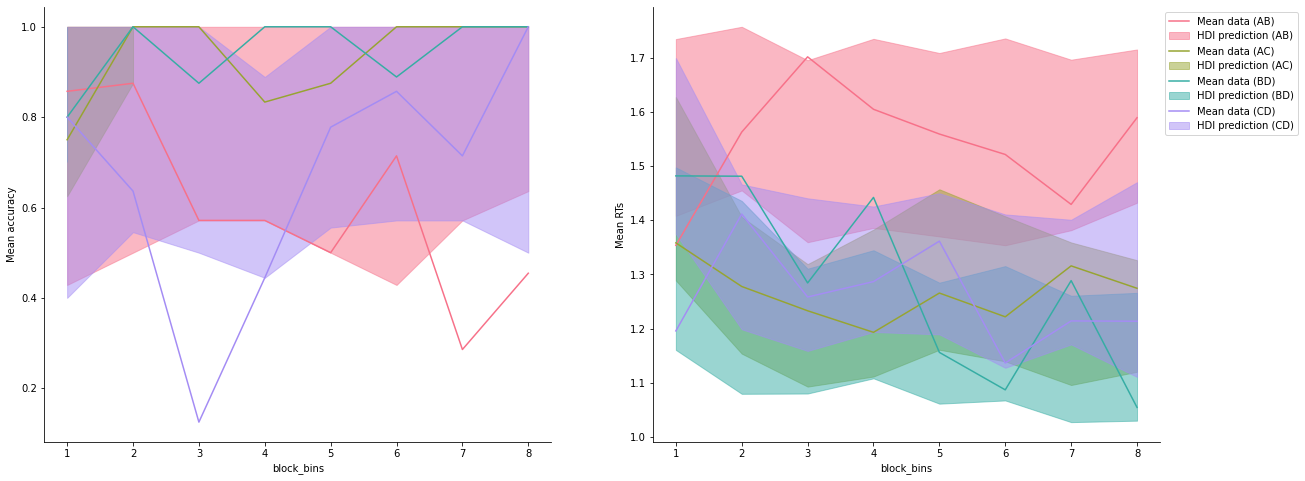

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

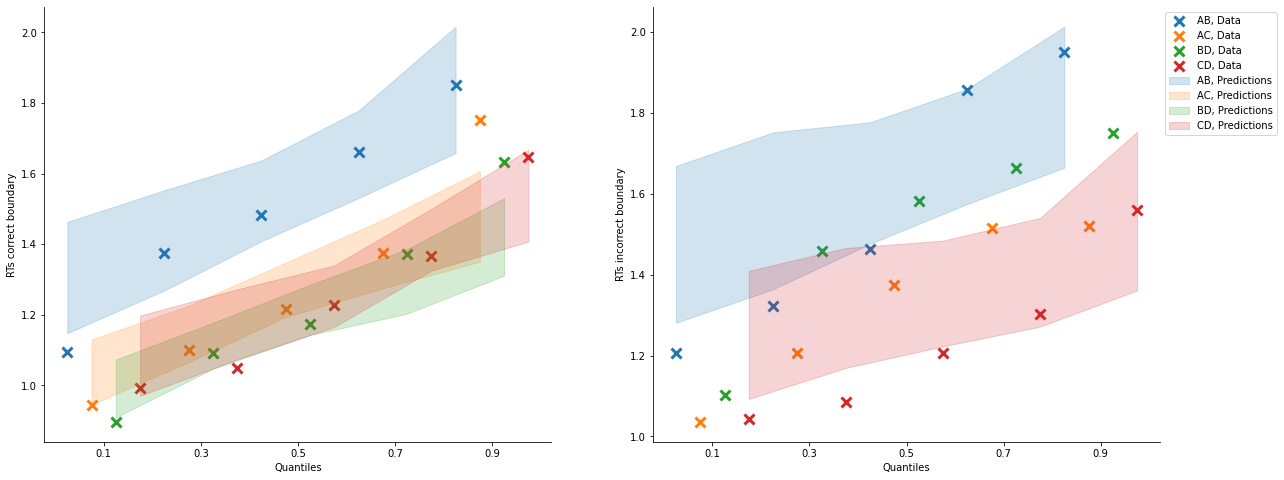

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [25]:
import seaborn as sns

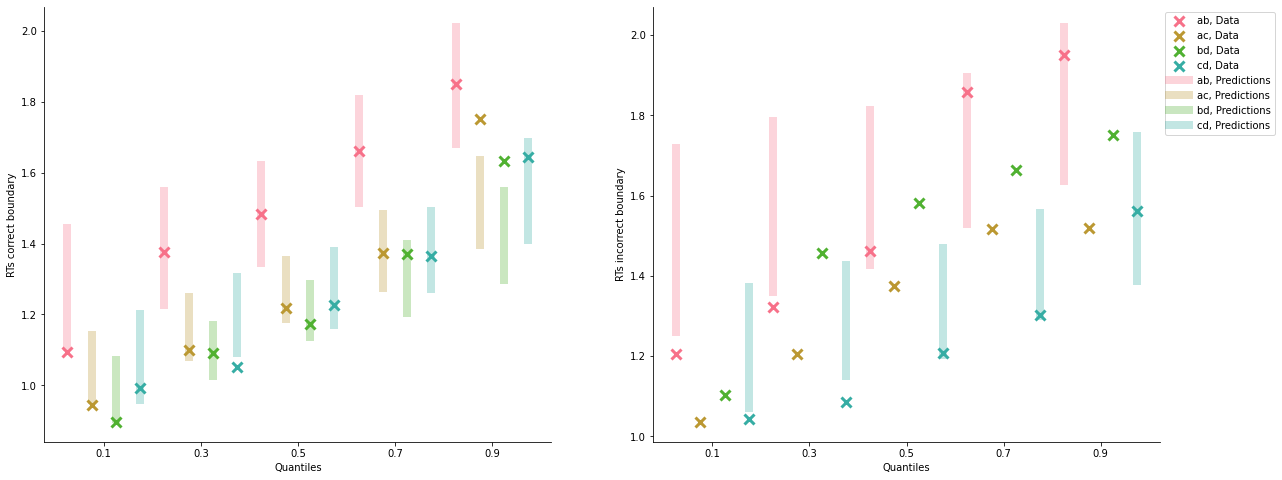

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);

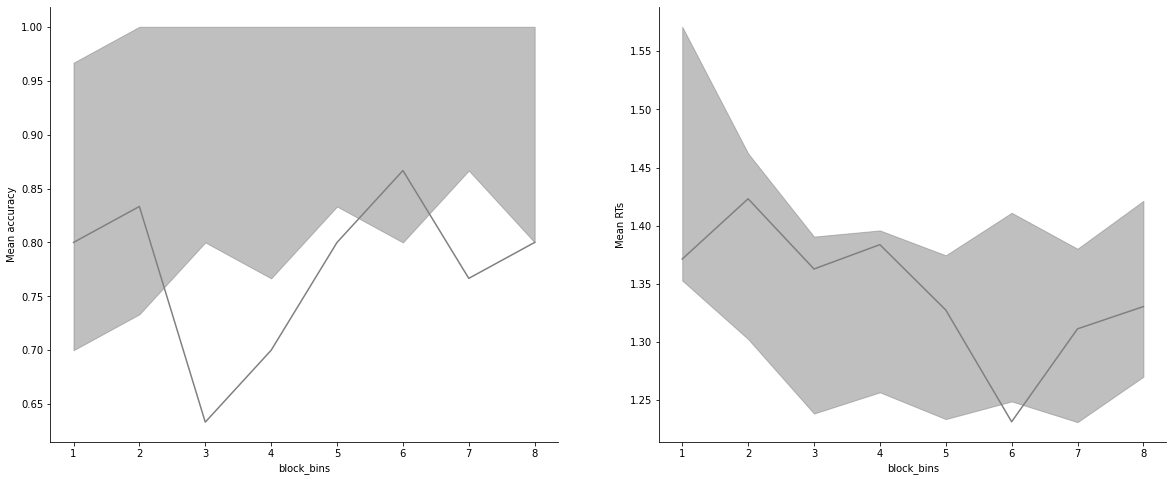

In [27]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=100,
    figsize=(20,8));